In [73]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm #progress of running
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model

In [78]:
# from keras.models import Input, Model

from scipy import sparse
import pandas as pd


# Iterate through the list of DataFrames
#for i, text_df in enumerate(text):
 #   texts_column = text_df['text'].tolist()  # Extract the 'text' column as a list
  #  print(f"Number of sentences in DataFrame {i + 1}: {len(texts_column)}")
   # print(texts_column)

import re

def text_preprocessing( text,punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also','an','on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as','by','that','has','can','of','to','have','such','f1','into','at','rnns']):
    """
    A method to preprocess text
    """
    #for x in text.lower():# for each sentence
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "") #تبديل كل دا ب empty string

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text) #

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lowercase
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Dropping empty strings
    text = [x for x in text if x != '']

    # Dropping stop words
    text = [x for x in text if x not in stop_words]

    return text

punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~'''
stop_words=['and', 'a','due','end', 'is', 'ler', 'another','same','jes', 'joined','new', 'next', 'one','signing','sixyear','oneyear','part','after','days','fouryear','had', 'having' , 'him', 'his','the', 'in', 'be', 'will', 'was', 'but', 'this', 'were', 'with', 'of', 'also','an','on', '.', 'for', 'any', 'its', 'and', 'are', 'from', 'both', 'as','by','that','has','can','of','to','have','such','f1','into','at','rnns']

In [79]:
window = 2
texts = []  # Initialize an empty list to store DataFrames

# Read the CSV files and append DataFrames to the list
texts1 = pd.read_csv('corpus1.csv')
texts.append(texts1)

texts2 = pd.read_csv('corpus2.csv')
texts.append(texts2)

# Creating a placeholder for the scanning of the word list
word_lists1 = []
all_text1 = []
word_lists2 = []
all_text2 = []
for i, text_df in enumerate(texts):
    texts_column = text_df['text'].tolist()  # Extract the 'text' column as a list
    #print(texts_column)
    for text in texts_column:
    # Cleaning the text
        text = text_preprocessing(text,punctuations,stop_words)
       # print (text)

    # Appending to the all text list
        if i==0:
            all_text1 += text
        if i==1:
            all_text2 += text

    # Creating a context dictionary
        for j, word in enumerate(text):
            for w in range(window):
            # Getting the context that is ahead by *window* words
                if j + 1 + w < len(text):
                    if i==0:
                        word_lists1.append([word] + [text[(j + 1 + w)]])
                    if i==1:
                        word_lists2.append([word] + [text[(j + 1 + w)]])
            # Getting the context that is behind by *window* words
                if j - w - 1 >= 0:
                    if i==0:
                        word_lists1.append([word] + [text[(j - w - 1)]])
                    if i==1:
                        word_lists2.append([word] + [text[(j - w - 1)]])
#print('111',word_lists1)
#print('222',word_lists2)
# %%
def create_unique_word_dict(text: list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i  #put word in dictionary and put the i (position )of this word
        })

    return unique_word_dict



In [80]:
# %%
unique_word_dict1 = create_unique_word_dict(all_text1)
unique_word_dict2 = create_unique_word_dict(all_text2)

# Defining the number of features (unique words)
n_words1 = len(unique_word_dict1)
n_words2 = len(unique_word_dict2)

print(unique_word_dict1)
print(unique_word_dict2)
# Getting all the unique words
words1 = list(unique_word_dict1.keys())
words2 = list(unique_word_dict2.keys())

#print(words1)
#print(words2)

#print(word_lists1)
# Creating the X and Y matrices using one hot encoding
#print(n_words)
word_lists=[]
word_lists.append(word_lists1)
word_lists.append(word_lists2)
X1 = []
Y1 = []
X2 = []
Y2 = []
#for j in word_lists:
for j, wordlistj in enumerate(word_lists):
    if j==0: 
        for i, word_list in tqdm(enumerate(wordlistj)):
        # Getting the indices
            print(word_list)
            main_word_index1 = unique_word_dict1.get(word_list[0])
            context_word_index1 = unique_word_dict1.get(word_list[1])
            # print (word_list)
            print(word_list[0], main_word_index1)
            print(word_list[1], context_word_index1)

            # Creating the placeholders
            X_row1 = np.zeros(n_words1)
            Y_row1 = np.zeros(n_words1)

            # One hot encoding the main word
            X_row1[main_word_index1] = 1

            # One hot encoding the Y matrix words
            Y_row1[context_word_index1] = 1

            # Appending to the main matrices     
            X1.append(X_row1)
            Y1.append(Y_row1)
        print("X111",X1)
        print(Y1)
    if j==1:  
        for i, word_list in tqdm(enumerate(wordlistj)):
            print(word_list)
            main_word_index2 = unique_word_dict2.get(word_list[0])
            context_word_index2 = unique_word_dict2.get(word_list[1])
            # print (word_list)
            print(word_list[0], main_word_index2)
            print(word_list[1], context_word_index2)

            # Creating the placeholders
            X_row2 = np.zeros(n_words2)
            Y_row2 = np.zeros(n_words2)

            # One hot encoding the main word
            X_row2[main_word_index2] = 1

            # One hot encoding the Y matrix words
            Y_row2[context_word_index2] = 1

            # Appending to the main matrices     
            X2.append(X_row2)
            Y2.append(Y_row2)
        print("X222",X2)
        print(Y2)
    # Converting the matrices into a sparse format because the vast majority of the data are 0s


{'academy': 0, 'additionally': 1, 'agreed': 2, 'agreeing': 3, 'agreement': 4, 'announced': 5, 'arda': 6, 'asensio': 7, 'back': 8, 'bellingham': 9, 'benzema': 10, 'blancos': 11, 'borussia': 12, 'brahim': 13, 'brought': 14, 'captain': 15, 'ceballos': 16, 'clause': 17, 'club': 18, 'clubs': 19, 'confirmed': 20, 'contract': 21, 'croatian': 22, 'dani': 23, 'day': 24, 'daz': 25, 'deal': 26, 'decorated': 27, 'depart': 28, 'departure': 29, 'dortmund': 30, 'eden': 31, 'englishman': 32, 'espanyolon': 33, 'expiration': 34, 'extended': 35, 'extending': 36, 'extension': 37, 'fenerbahçe': 38, 'first': 39, 'five': 40, 'following': 41, 'former': 42, 'fran': 43, 'frenchman': 44, 'garca': 45, 'goodbye': 46, 'granada': 47, 'hazard': 48, 'history': 49, 'jointmost': 50, 'joselu': 51, 'jude': 52, 'july': 53, 'june': 54, 'karim': 55, 'keeping': 56, 'kroos': 57, 'later': 58, 'leaving': 59, 'loan': 60, 'los': 61, 'luka': 62, 'madrid': 63, 'marco': 64, 'mariano': 65, 'midfielder': 66, 'modri': 67, 'more': 68, 'n

482it [00:00, 63917.75it/s]

['june', 'season']
june 54
season 82
['season', 'june']
season 82
june 54
['madrid', 'announced']
madrid 63
announced 5
['madrid', 'departure']
madrid 63
departure 29
['announced', 'departure']
announced 5
departure 29
['announced', 'madrid']
announced 5
madrid 63
['announced', 'marco']
announced 5
marco 64
['departure', 'marco']
departure 29
marco 64
['departure', 'announced']
departure 29
announced 5
['departure', 'asensio']
departure 29
asensio 7
['departure', 'madrid']
departure 29
madrid 63
['marco', 'asensio']
marco 64
asensio 7
['marco', 'departure']
marco 64
departure 29
['marco', 'expiration']
marco 64
expiration 34
['marco', 'announced']
marco 64
announced 5
['asensio', 'expiration']
asensio 7
expiration 34
['asensio', 'marco']
asensio 7
marco 64
['asensio', 'contract']
asensio 7
contract 21
['asensio', 'departure']
asensio 7
departure 29
['expiration', 'contract']
expiration 34
contract 21
['expiration', 'asensio']
expiration 34
asensio 7
['expiration', 'marco']
expiration 3

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.

608it [00:00, 37986.34it/s]

['bayern', 'most']
bayern 6
most 57
['bayern', 'successful']
bayern 6
successful 80
['most', 'successful']
most 57
successful 80
['most', 'bayern']
most 57
bayern 6
['most', 'club']
most 57
club 15
['successful', 'club']
successful 80
club 15
['successful', 'most']
successful 80
most 57
['successful', 'german']
successful 80
german 37
['successful', 'bayern']
successful 80
bayern 6
['club', 'german']
club 15
german 37
['club', 'successful']
club 15
successful 80
['club', 'football']
club 15
football 32
['club', 'most']
club 15
most 57
['german', 'football']
german 37
football 32
['german', 'club']
german 37
club 15
['german', 'history']
german 37
history 41
['german', 'successful']
german 37
successful 80
['football', 'history']
football 32
history 41
['football', 'german']
football 32
german 37
['football', 'club']
football 32
club 15
['history', 'football']
history 41
football 32
['history', 'german']
history 41
german 37
['won', 'record']
won 101
record 70
['won', 'national']
won 10

[array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [81]:
import tensorflow as tf
XX1 = tf.convert_to_tensor(X1, dtype=tf.float32)
YY1 = tf.convert_to_tensor(Y1, dtype=tf.float32)
print(XX1.shape)
print(YY1.shape)
XX2 = tf.convert_to_tensor(X2, dtype=tf.float32)
YY2 = tf.convert_to_tensor(Y2, dtype=tf.float32)
print(XX2.shape)
print(YY2.shape)


def CreateModel1():
    # Defining the size of the embedding
    embed_size = 2 # no of features
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX1.shape[1])  # 21 input
    x = Dense(units=embed_size, activation='linear')(inp) # input * weights
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY1.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model
def CreateModel2():
    # Defining the size of the embedding
    embed_size = 2 # no of features
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX2.shape[1])  # 21 input
    x = Dense(units=embed_size, activation='linear')(inp) # input * weights
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY2.shape[1], activation='softmax')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    model.summary()
    return model

(482, 104)
(482, 104)
(608, 104)
(608, 104)


In [82]:
model1 = CreateModel1()
model2 = CreateModel2()

# Optimizing the network weights
model1.fit(
    x=XX1,
    y=YY1,
    batch_size=10,
    epochs=2000
)
model2.fit(
    x=XX2,
    y=YY2,
    batch_size=10,
    epochs=2000
)
# The input layer

weights1 = model1.get_weights()[0] 
print(weights1.shape)#21word*2 features 
print(weights1)

# weights = model.get_weights()[2]
# print (weights)

#get the weight for each unique word


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 104)]             0         
                                                                 
 dense_12 (Dense)            (None, 2)                 210       
                                                                 
 dense_13 (Dense)            (None, 104)               312       
                                                                 
Total params: 522 (2.04 KB)
Trainable params: 522 (2.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 104)]             0         
                                                                 
 dense_14 (D

49/49 [==============================] - 0s 2ms/step - loss: 3.4092
Epoch 180/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.4058
Epoch 181/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.4034
Epoch 182/2000
49/49 [==============================] - 0s 3ms/step - loss: 3.4002
Epoch 183/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3976
Epoch 184/2000
49/49 [==============================] - 0s 3ms/step - loss: 3.3948
Epoch 185/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3921
Epoch 186/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3897
Epoch 187/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3865
Epoch 188/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3842
Epoch 189/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3814
Epoch 190/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.3785
Epoch 191/2000
49/4

49/49 [==============================] - 0s 2ms/step - loss: 3.0829
Epoch 376/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0812
Epoch 377/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0803
Epoch 378/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0792
Epoch 379/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0788
Epoch 380/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0777
Epoch 381/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0761
Epoch 382/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0750
Epoch 383/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0746
Epoch 384/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0735
Epoch 385/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0721
Epoch 386/2000
49/49 [==============================] - 0s 2ms/step - loss: 3.0715
Epoch 387/2000
49/4

49/49 [==============================] - 0s 3ms/step - loss: 2.9319
Epoch 572/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9311
Epoch 573/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9312
Epoch 574/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9306
Epoch 575/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9299
Epoch 576/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9288
Epoch 577/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9286
Epoch 578/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9288
Epoch 579/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9274
Epoch 580/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9270
Epoch 581/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9268
Epoch 582/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.9266
Epoch 583/2000
49/4

49/49 [==============================] - 0s 2ms/step - loss: 2.8423
Epoch 768/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8423
Epoch 769/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8422
Epoch 770/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8415
Epoch 771/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8418
Epoch 772/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8411
Epoch 773/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8403
Epoch 774/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8393
Epoch 775/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8397
Epoch 776/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8395
Epoch 777/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8392
Epoch 778/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.8386
Epoch 779/2000
49/4

49/49 [==============================] - 0s 2ms/step - loss: 2.7858
Epoch 964/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7861
Epoch 965/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7853
Epoch 966/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7852
Epoch 967/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7852
Epoch 968/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7848
Epoch 969/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7853
Epoch 970/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7842
Epoch 971/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7845
Epoch 972/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7840
Epoch 973/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7839
Epoch 974/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7837
Epoch 975/2000
49/4

49/49 [==============================] - 0s 2ms/step - loss: 2.7630
Epoch 1062/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7621
Epoch 1063/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7623
Epoch 1064/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7617
Epoch 1065/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7612
Epoch 1066/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7609
Epoch 1067/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7611
Epoch 1068/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7609
Epoch 1069/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7608
Epoch 1070/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7602
Epoch 1071/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7603
Epoch 1072/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7592
Epoch 10

49/49 [==============================] - 0s 2ms/step - loss: 2.7223
Epoch 1256/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7231
Epoch 1257/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7219
Epoch 1258/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7218
Epoch 1259/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7225
Epoch 1260/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7213
Epoch 1261/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7209
Epoch 1262/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7208
Epoch 1263/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7206
Epoch 1264/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7207
Epoch 1265/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7202
Epoch 1266/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.7193
Epoch 12

49/49 [==============================] - 0s 2ms/step - loss: 2.6881
Epoch 1450/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6869
Epoch 1451/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6874
Epoch 1452/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6868
Epoch 1453/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6865
Epoch 1454/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6857
Epoch 1455/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6857
Epoch 1456/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6860
Epoch 1457/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6857
Epoch 1458/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6857
Epoch 1459/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6858
Epoch 1460/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6853
Epoch 14

49/49 [==============================] - 0s 2ms/step - loss: 2.6567
Epoch 1644/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6564
Epoch 1645/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6571
Epoch 1646/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6567
Epoch 1647/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6573
Epoch 1648/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6555
Epoch 1649/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6572
Epoch 1650/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6562
Epoch 1651/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6557
Epoch 1652/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6554
Epoch 1653/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6566
Epoch 1654/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6557
Epoch 16

49/49 [==============================] - 0s 2ms/step - loss: 2.6358
Epoch 1838/2000
49/49 [==============================] - 0s 3ms/step - loss: 2.6351
Epoch 1839/2000
49/49 [==============================] - 0s 3ms/step - loss: 2.6365
Epoch 1840/2000
49/49 [==============================] - 0s 3ms/step - loss: 2.6362
Epoch 1841/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6356
Epoch 1842/2000
49/49 [==============================] - 0s 3ms/step - loss: 2.6362
Epoch 1843/2000
49/49 [==============================] - 0s 3ms/step - loss: 2.6348
Epoch 1844/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6349
Epoch 1845/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6353
Epoch 1846/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6347
Epoch 1847/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6357
Epoch 1848/2000
49/49 [==============================] - 0s 2ms/step - loss: 2.6343
Epoch 18

61/61 [==============================] - 0s 2ms/step - loss: 4.1929
Epoch 33/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1878
Epoch 34/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1829
Epoch 35/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1779
Epoch 36/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1731
Epoch 37/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1675
Epoch 38/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1628
Epoch 39/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1580
Epoch 40/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1529
Epoch 41/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1475
Epoch 42/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1428
Epoch 43/2000
61/61 [==============================] - 0s 2ms/step - loss: 4.1377
Epoch 44/2000
61/61 [=========

61/61 [==============================] - 0s 2ms/step - loss: 3.5568
Epoch 230/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5549
Epoch 231/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5533
Epoch 232/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5518
Epoch 233/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5503
Epoch 234/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5486
Epoch 235/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5469
Epoch 236/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5452
Epoch 237/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5442
Epoch 238/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5424
Epoch 239/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5405
Epoch 240/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.5390
Epoch 241/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.3367
Epoch 426/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3356
Epoch 427/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3351
Epoch 428/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3340
Epoch 429/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3333
Epoch 430/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3323
Epoch 431/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3320
Epoch 432/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.3309
Epoch 433/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3308
Epoch 434/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3298
Epoch 435/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3290
Epoch 436/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.3281
Epoch 437/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.2354
Epoch 622/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2348
Epoch 623/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2349
Epoch 624/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2346
Epoch 625/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2339
Epoch 626/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2338
Epoch 627/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2334
Epoch 628/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2330
Epoch 629/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2325
Epoch 630/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2327
Epoch 631/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2320
Epoch 632/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.2319
Epoch 633/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.1938
Epoch 818/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1939
Epoch 819/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1936
Epoch 820/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1932
Epoch 821/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1934
Epoch 822/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1929
Epoch 823/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1929
Epoch 824/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1929
Epoch 825/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1923
Epoch 826/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1924
Epoch 827/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1926
Epoch 828/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1925
Epoch 829/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.1712
Epoch 1014/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1712
Epoch 1015/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1712
Epoch 1016/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1706
Epoch 1017/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1706
Epoch 1018/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1707
Epoch 1019/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1710
Epoch 1020/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1702
Epoch 1021/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1704
Epoch 1022/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1701
Epoch 1023/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1704
Epoch 1024/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1693
Epoch 10

61/61 [==============================] - 0s 2ms/step - loss: 3.1549
Epoch 1208/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1545
Epoch 1209/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1547
Epoch 1210/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1551
Epoch 1211/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1544
Epoch 1212/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1549
Epoch 1213/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1545
Epoch 1214/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1547
Epoch 1215/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1547
Epoch 1216/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1543
Epoch 1217/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1542
Epoch 1218/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1538
Epoch 12

61/61 [==============================] - 0s 2ms/step - loss: 3.1427
Epoch 1402/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1425
Epoch 1403/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1422
Epoch 1404/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1430
Epoch 1405/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1419
Epoch 1406/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1427
Epoch 1407/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1425
Epoch 1408/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1423
Epoch 1409/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1424
Epoch 1410/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1426
Epoch 1411/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1417
Epoch 1412/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1430
Epoch 14

61/61 [==============================] - 0s 2ms/step - loss: 3.1324
Epoch 1596/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1322
Epoch 1597/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1334
Epoch 1598/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1323
Epoch 1599/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1323
Epoch 1600/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1321
Epoch 1601/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1327
Epoch 1602/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1322
Epoch 1603/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1320
Epoch 1604/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1323
Epoch 1605/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1323
Epoch 1606/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1318
Epoch 16

61/61 [==============================] - 0s 2ms/step - loss: 3.1248
Epoch 1790/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1244
Epoch 1791/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1251
Epoch 1792/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1248
Epoch 1793/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1250
Epoch 1794/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1244
Epoch 1795/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1243
Epoch 1796/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1244
Epoch 1797/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1244
Epoch 1798/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1245
Epoch 1799/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1248
Epoch 1800/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1238
Epoch 18

61/61 [==============================] - 0s 3ms/step - loss: 3.1179
Epoch 1984/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1183
Epoch 1985/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1176
Epoch 1986/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1185
Epoch 1987/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1179
Epoch 1988/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1182
Epoch 1989/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1177
Epoch 1990/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1184
Epoch 1991/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1179
Epoch 1992/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1181
Epoch 1993/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1182
Epoch 1994/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1184
Epoch 19

In [83]:
model2.fit(
    x=XX2,
    y=YY2,
    batch_size=10,
    epochs=2000
)
# The input layer

weights2 = model2.get_weights()[0] 
print(weights2.shape)#21word*2 features 
print(weights2)


Epoch 1/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1181
Epoch 2/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1176
Epoch 3/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1174
Epoch 4/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1172
Epoch 5/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1169
Epoch 6/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1172
Epoch 7/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1176
Epoch 8/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1173
Epoch 9/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1182
Epoch 10/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1171
Epoch 11/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1164
Epoch 12/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1169
Epoch 13/2000
61/61 [====

61/61 [==============================] - 0s 2ms/step - loss: 3.1152
Epoch 102/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1147
Epoch 103/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1143
Epoch 104/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1150
Epoch 105/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1144
Epoch 106/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1148
Epoch 107/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1148
Epoch 108/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1152
Epoch 109/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1144
Epoch 110/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1146
Epoch 111/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1151
Epoch 112/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1146
Epoch 113/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.1101
Epoch 298/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1098
Epoch 299/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1099
Epoch 300/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1093
Epoch 301/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1092
Epoch 302/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1102
Epoch 303/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1095
Epoch 304/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1098
Epoch 305/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1096
Epoch 306/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1096
Epoch 307/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1100
Epoch 308/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1097
Epoch 309/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.1058
Epoch 494/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1054
Epoch 495/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1059
Epoch 496/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1044
Epoch 497/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1053
Epoch 498/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1048
Epoch 499/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1053
Epoch 500/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1052
Epoch 501/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1049
Epoch 502/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1054
Epoch 503/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1050
Epoch 504/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1047
Epoch 505/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.1017
Epoch 690/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1017
Epoch 691/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1019
Epoch 692/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1008
Epoch 693/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1010
Epoch 694/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1009
Epoch 695/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1009
Epoch 696/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1007
Epoch 697/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1015
Epoch 698/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1011
Epoch 699/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.1004
Epoch 700/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.1013
Epoch 701/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.0978
Epoch 886/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0976
Epoch 887/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0969
Epoch 888/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0970
Epoch 889/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0971
Epoch 890/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0967
Epoch 891/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0962
Epoch 892/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0963
Epoch 893/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0969
Epoch 894/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0978
Epoch 895/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0973
Epoch 896/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0968
Epoch 897/2000
61/6

61/61 [==============================] - 0s 2ms/step - loss: 3.0934
Epoch 1081/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0935
Epoch 1082/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0932
Epoch 1083/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0935
Epoch 1084/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0924
Epoch 1085/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0923
Epoch 1086/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0936
Epoch 1087/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0923
Epoch 1088/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0931
Epoch 1089/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0938
Epoch 1090/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0930
Epoch 1091/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0930
Epoch 10

61/61 [==============================] - 0s 2ms/step - loss: 3.0886
Epoch 1275/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0885
Epoch 1276/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0885
Epoch 1277/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0890
Epoch 1278/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0887
Epoch 1279/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0893
Epoch 1280/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0887
Epoch 1281/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0891
Epoch 1282/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0890
Epoch 1283/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0886
Epoch 1284/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0888
Epoch 1285/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0886
Epoch 12

61/61 [==============================] - 0s 3ms/step - loss: 3.0852
Epoch 1469/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0851
Epoch 1470/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0847
Epoch 1471/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0845
Epoch 1472/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0856
Epoch 1473/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0846
Epoch 1474/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0850
Epoch 1475/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0851
Epoch 1476/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0853
Epoch 1477/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0849
Epoch 1478/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0859
Epoch 1479/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0850
Epoch 14

61/61 [==============================] - 0s 3ms/step - loss: 3.0811
Epoch 1663/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0824
Epoch 1664/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0816
Epoch 1665/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0814
Epoch 1666/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0815
Epoch 1667/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0819
Epoch 1668/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0817
Epoch 1669/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0814
Epoch 1670/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0818
Epoch 1671/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0809
Epoch 1672/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0815
Epoch 1673/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0812
Epoch 16

61/61 [==============================] - 0s 3ms/step - loss: 3.0788
Epoch 1857/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0786
Epoch 1858/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0796
Epoch 1859/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0784
Epoch 1860/2000
61/61 [==============================] - 0s 3ms/step - loss: 3.0785
Epoch 1861/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0779
Epoch 1862/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0782
Epoch 1863/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0782
Epoch 1864/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0791
Epoch 1865/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0780
Epoch 1866/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0778
Epoch 1867/2000
61/61 [==============================] - 0s 2ms/step - loss: 3.0774
Epoch 18

In [84]:
embedding_dict1 = {}
word_embeddings1=[]
for word in words1: #to pick the a row of weight of two values for each unique word since weights = 21*2
    word_embeddings1.append(weights1[unique_word_dict1.get(word)])
    embedding_dict1.update({
        word: weights1[unique_word_dict1.get(word)]}
        
    )

#print(embedding_dict1)
print(word_embeddings1)
word_embeddings2=[]
embedding_dict2 = {}
for word in words2: #to pick the a row of weight of two values for each unique word since weights = 21*2
    word_embeddings2.append(weights2[unique_word_dict2.get(word)])
    embedding_dict2.update({
        word: weights2[unique_word_dict2.get(word)]}
        
    )
print(word_embeddings2)

#print(embedding_dict2)

[array([-6.0976663,  1.3713791], dtype=float32), array([ 5.611469 , -3.7483397], dtype=float32), array([ -5.5877337, -10.943382 ], dtype=float32), array([15.645712,  9.300594], dtype=float32), array([-0.884305  , -0.65144455], dtype=float32), array([-1.5314646 , -0.97471195], dtype=float32), array([-2.9526055, -2.9503596], dtype=float32), array([  0.04621558, -17.047245  ], dtype=float32), array([-9.459139, -1.279499], dtype=float32), array([-10.045188 ,   5.0047913], dtype=float32), array([-0.21378458,  0.10923999], dtype=float32), array([ 2.0202992, 18.56405  ], dtype=float32), array([-13.000996 ,   6.4960346], dtype=float32), array([-0.980796 , -4.1909847], dtype=float32), array([-10.952716 ,  -2.2978332], dtype=float32), array([-0.09918708,  0.14000846], dtype=float32), array([ 1.3546925, -2.1251545], dtype=float32), array([14.690296  , -0.65020764], dtype=float32), array([0.54751533, 0.14685398], dtype=float32), array([-3.0753489 ,  0.21528724], dtype=float32), array([-2.2553961, 

0  >>  academy
1  >>  additionally
2  >>  agreed
3  >>  agreeing
4  >>  agreement
5  >>  announced
6  >>  arda
7  >>  asensio
8  >>  back
9  >>  bellingham
10  >>  benzema
11  >>  blancos
12  >>  borussia
13  >>  brahim
14  >>  brought
15  >>  captain
16  >>  ceballos
17  >>  clause
18  >>  club
19  >>  clubs
20  >>  confirmed
21  >>  contract
22  >>  croatian
23  >>  dani
24  >>  day
25  >>  daz
26  >>  deal
27  >>  decorated
28  >>  depart
29  >>  departure
30  >>  dortmund
31  >>  eden
32  >>  englishman
33  >>  espanyolon
34  >>  expiration
35  >>  extended
36  >>  extending
37  >>  extension
38  >>  fenerbahçe
39  >>  first
40  >>  five
41  >>  following
42  >>  former
43  >>  fran
44  >>  frenchman
45  >>  garca
46  >>  goodbye
47  >>  granada
48  >>  hazard
49  >>  history
50  >>  jointmost
51  >>  joselu
52  >>  jude
53  >>  july
54  >>  june
55  >>  karim
56  >>  keeping
57  >>  kroos
58  >>  later
59  >>  leaving
60  >>  loan
61  >>  los
62  >>  luka
63  >>  madrid
64  >>  ma

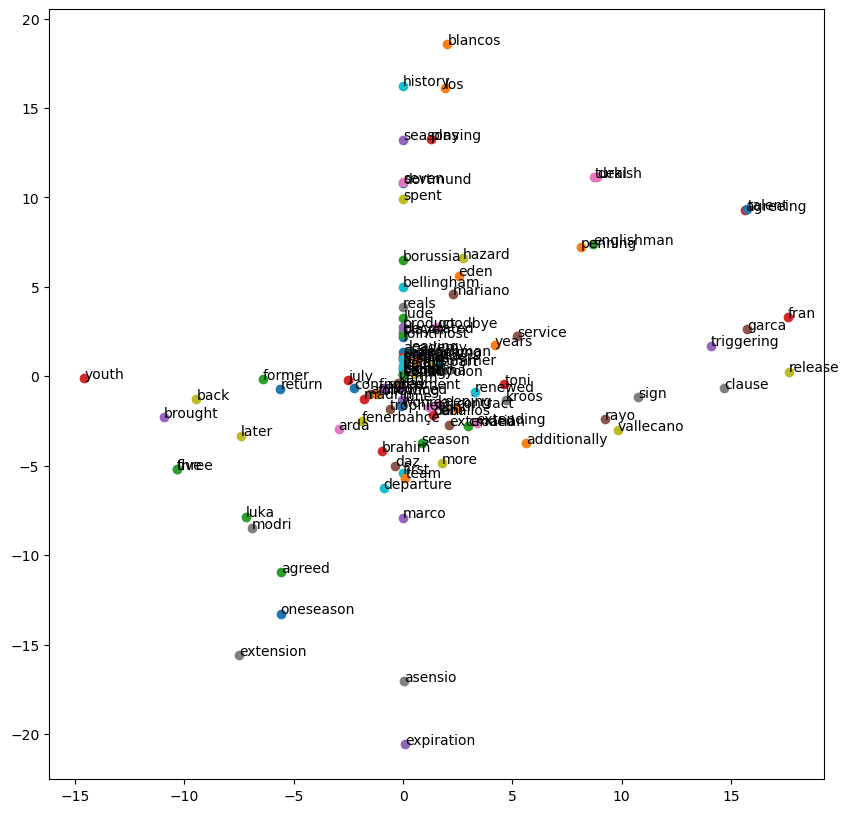

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict1.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict1.get(word)
    if weights1[i][0] < 0 and weights1[i][1] > 0:
        plt.scatter(0, weights1[i][1])
        plt.annotate(word, (0, weights1[i][1]))
    else:
        plt.scatter(weights1[i][0], weights1[i][1])
        plt.annotate(word, (weights1[i][0], weights1[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

0  >>  accumulated
1  >>  achieve
2  >>  all
3  >>  along
4  >>  awards
5  >>  ballon
6  >>  bayern
7  >>  became
8  >>  beckenbauer
9  >>  best
10  >>  bundesliga
11  >>  calendar
12  >>  captaincy
13  >>  champions
14  >>  championship
15  >>  club
16  >>  clubs
17  >>  competes
18  >>  competitions
19  >>  consecutive
20  >>  consecutively
21  >>  cup
22  >>  cups
23  >>  cupuefa
24  >>  dor
25  >>  european
26  >>  fc
27  >>  feat
28  >>  fifa
29  >>  final
30  >>  first
31  >>  five
32  >>  football
33  >>  footballer
34  >>  founded
35  >>  four
36  >>  franz
37  >>  german
38  >>  given
39  >>  golden
40  >>  greatest
41  >>  history
42  >>  honours
43  >>  inception
44  >>  including
45  >>  intercontinental
46  >>  international
47  >>  internationally
48  >>  it
49  >>  johnalthough
50  >>  league
51  >>  led
52  >>  local
53  >>  main
54  >>  making
55  >>  may
56  >>  mens
57  >>  most
58  >>  munich
59  >>  national
60  >>  not
61  >>  numerous
62  >>  only
63  >>  or
64  

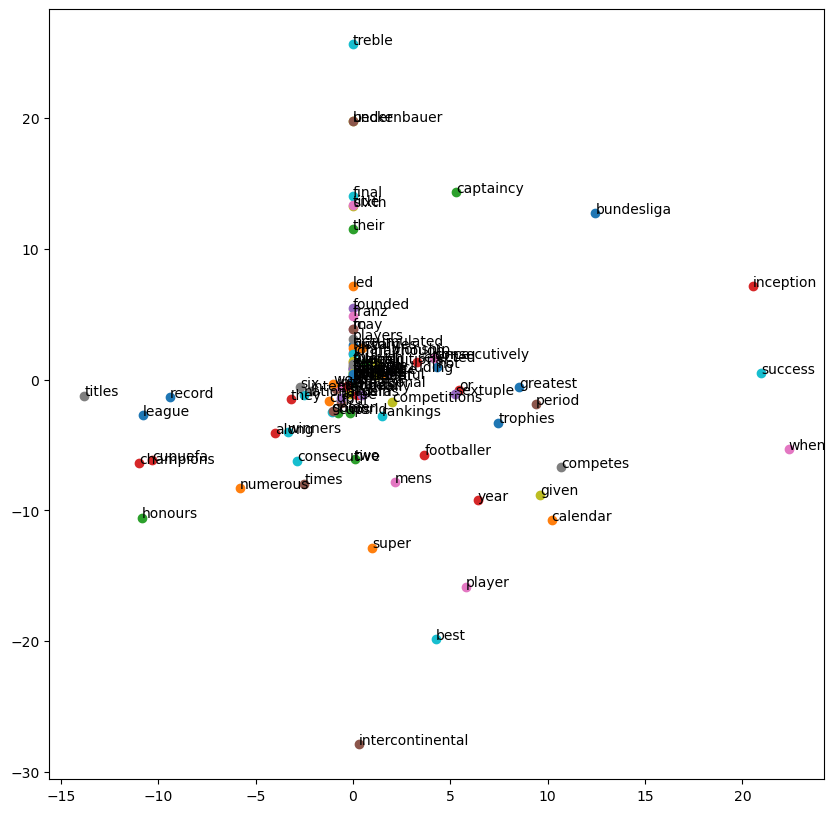

In [86]:
plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict2.keys()):
    print(i, ' >> ', word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict2.get(word)
    if weights2[i][0] < 0 and weights2[i][1] > 0:
        plt.scatter(0, weights2[i][1])
        plt.annotate(word, (0, weights2[i][1]))
    else:
        plt.scatter(weights2[i][0], weights2[i][1])
        plt.annotate(word, (weights2[i][0], weights2[i][1]))

        #plt.xlim(-0.5, 0.5)
        #plt.ylim(-0.5, 0.5)
        #plt.show()
    i = i + 1

In [87]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

In [88]:
cosine_similarities=cosine_similarity(word_embeddings1,word_embeddings2)
print(cosine_similarities)
euclidian_similarities= euclidean_distances(word_embeddings1,word_embeddings2)
print(euclidian_similarities)


[[ 0.993074   -0.0524799  -0.11444116 ...  0.8642277  -0.15646486
  -0.73656356]
 [-0.96893066  0.4079364   0.46388993 ... -0.62561893  0.50103915
   0.9304592 ]
 [ 0.13271806  0.954333    0.93392175 ...  0.70189637  0.91792274
   0.47234342]
 ...
 [-0.7430953  -0.533595   -0.48000222 ... -0.9961158  -0.44236973
   0.21102728]
 [ 0.950858    0.1440317   0.08225296 ...  0.9459955   0.03991741
  -0.5899017 ]
 [ 0.9409665   0.17416275  0.11262755 ...  0.95544773  0.07039081
  -0.5649858 ]]
[[ 1.8677665  6.2639394  6.286649  ...  5.356047   7.136598  16.41131  ]
 [14.558612   6.667872   6.6271667 ...  7.4612646  5.891655   5.5555964]
 [13.70863   12.093518  12.03535   ... 11.564476   9.951513  12.124335 ]
 ...
 [11.700977   4.653813   4.6779027 ...  5.604273   6.15386   11.212035 ]
 [ 5.2141895  2.911445   2.9239721 ...  1.9565552  3.8437626 13.198985 ]
 [ 7.613207  14.547278  14.553347  ... 13.566942  14.630375  22.906204 ]]


In [89]:
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import euclidean_distances
# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

# Function to calculate Jaccard similarity between two word embeddings
def jaccard_similarity_measure(vec1, vec2):
    set1 = set(np.nonzero(vec1)[0])  # Indices of non-zero elements in vec1
    set2 = set(np.nonzero(vec2)[0])  # Indices of non-zero elements in vec2
    return jaccard_similarity(set1, set2)

# Calculate Jaccard similarities between word embeddings
jaccard_similarities = np.zeros((len(words1), len(words2)))
for i, embedding1 in enumerate(word_embeddings1):
    for j, embedding2 in enumerate(word_embeddings2):
        jaccard_similarities[i, j] = jaccard_similarity_measure(embedding1, embedding2)


# Print Jaccard similarities
print("\nJaccard Similarities:")
print(jaccard_similarities)



Jaccard Similarities:
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [90]:
from nltk.tokenize import word_tokenize

# Function for text preprocessing
def text_preprocessing(text, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''', stop_words=None):
    tokenized_text = []
    for sentence in text:
        # Tokenize the sentence
        tokens = word_tokenize(sentence.lower())

        # Remove punctuation and stop words
        tokens = [token for token in tokens if token not in punctuations and token not in stop_words]

        tokenized_text.append(tokens)
    
    return tokenized_text

In [91]:
# Preprocess the corpus
tokenized_corpus1 = text_preprocessing(texts1,punctuations,stop_words)
tokenized_corpus2 = text_preprocessing(texts2,punctuations,stop_words)


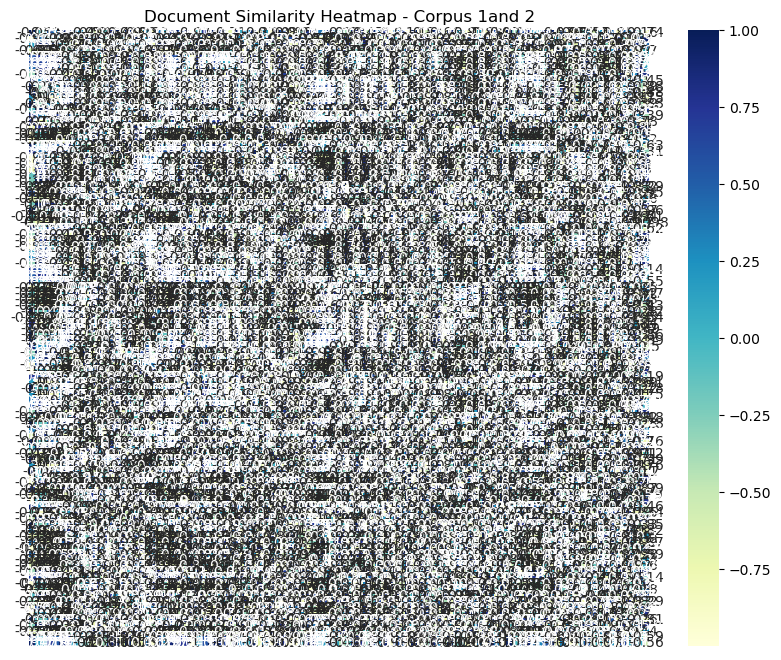

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


# Function to visualize document similarities using a heatmap
def visualize_heatmap(cosine_similarities, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_similarities, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.show()

# Visualize document similarities using heatmaps
visualize_heatmap(cosine_similarities, title='Document Similarity Heatmap - Corpus 1and 2')


C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


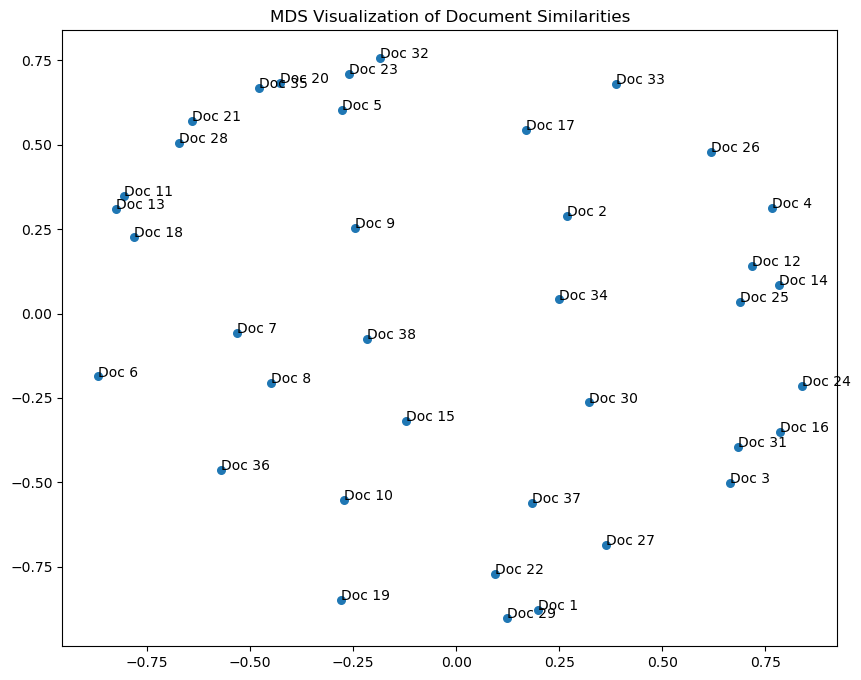

In [21]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Assuming cosine_similarities is a matrix of cosine similarities
# It might look like: 
cosine_similarities = cosine_similarity(word_embeddings1, word_embeddings2)
# Ensure symmetry by averaging with its transpose
cosine_similarities_symmetric = 0.5 * (cosine_similarities + cosine_similarities.T)

# Applying MDS to reduce dimensionality to 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
embedding = mds.fit_transform(1 - cosine_similarities_symmetric)

# Visualize the MDS embedding
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=30, marker='o')

# Annotate points with document labels or indices
for i, label in enumerate(range(1, len(embedding) + 1)):
    plt.annotate(f'Doc {label}', (embedding[i, 0], embedding[i, 1]))

plt.title('MDS Visualization of Document Similarities')
plt.show()